In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

Example of loading a dataset from the file datasets.txt:

In [113]:
datasets = open("datasets.txt","r")
datasets = datasets.read().splitlines()
# remove blank lines
for i in range(len(datasets)-3):
    if not datasets[i]:
        datasets.pop(i)
raw_current_dataset = datasets[len(datasets)-2].split(",")
raw_current_dataset.pop(len(raw_current_dataset)-1)
current_dataset = [float(val) for val in raw_current_dataset]
current_dataset

[-0.17866194136272642,
 20.0,
 -0.190078766296788,
 25.337,
 -0.19638040084078093,
 30.663,
 -0.20066937324080303,
 36.0,
 -0.2036697771038872,
 41.337,
 -0.2056494690116289,
 46.663,
 -0.20795326019210178,
 52.0,
 -0.2093279280606828,
 57.337,
 -0.2102148631440819,
 62.663,
 -0.21154247972314333,
 68.0,
 -0.2124488193784681,
 73.337,
 -0.2131116643808886,
 78.663,
 -0.21378857091428513,
 84.0,
 -0.2143866303111822,
 89.337,
 -0.21473636594336398,
 94.663]

Process data into correct type:

In [114]:
processed_data = [float(val) for val in current_dataset]

Split data into 2 separate lists:

In [115]:
distance, entropy = [], []
for i in range(len(processed_data)):
    if i == 0 or i%2 == 0:
        entropy.append(processed_data[i])
    else:
        distance.append(processed_data[i])

Plot entropy against distance:

Text(0.5, 1.0, 'Plot of entropy against distance')

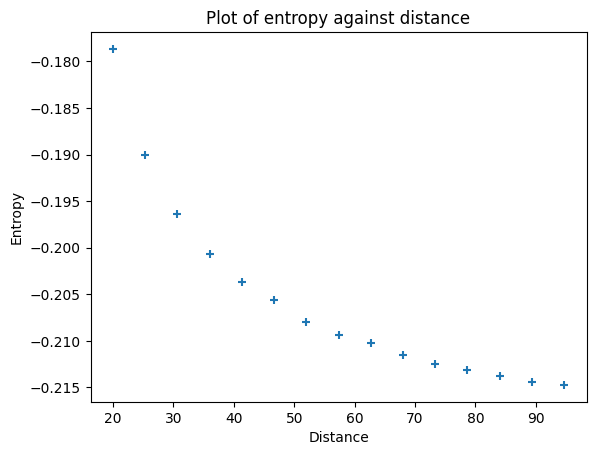

In [116]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Plot of entropy against distance")

Plot gradient against distance:

In [117]:
x_values,y_values = [],[]
for i in range(0,len(processed_data),2):
    x_values.append(processed_data[i+1])
    y_values.append(processed_data[i])

In [118]:
p = np.polyfit(x_values,y_values,3)
p

array([-1.90951399e-07,  4.13509696e-05, -3.06256504e-03, -1.34376277e-01])

Text(0.5, 1.0, 'Fitting a polynomial curve')

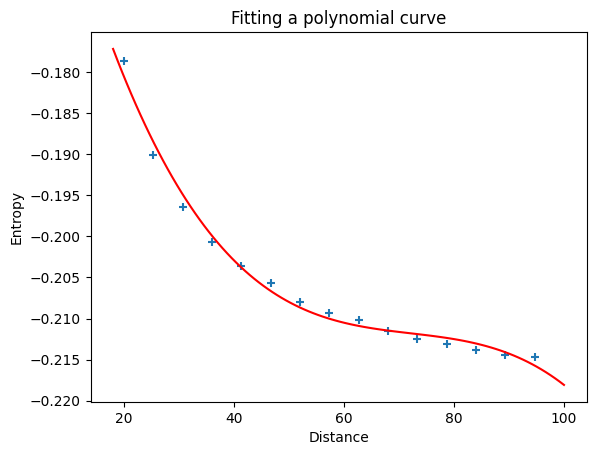

In [119]:
x = np.linspace(18,100,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting a polynomial curve")

In [120]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 1.7242668 , -1.24240392, -0.22067854])

Text(0.5, 1.0, 'Fitting an exponential curve')

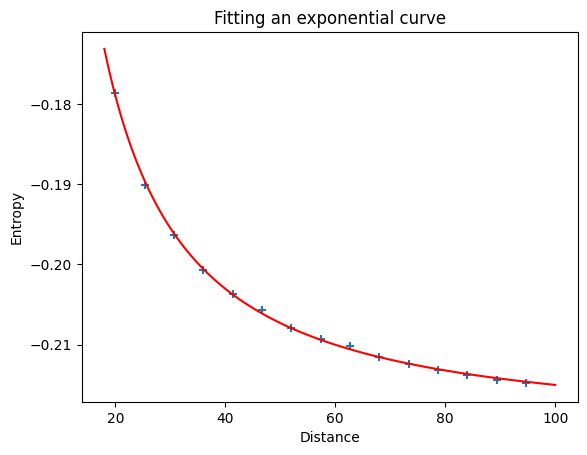

In [121]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting an exponential curve")

Calculate gradient between points and graph

In [122]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    gradient_vals.append((dS/dx,x))


Text(0.5, 1.0, 'Plotting dS/dx against distance(x)')

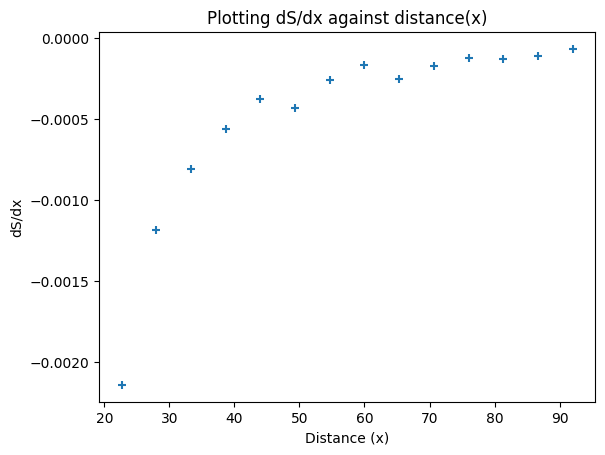

In [123]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])
#grad_xs.pop(0)
#grad_ys.pop(0)
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Plotting dS/dx against distance(x)")

a = 0.00042232107726983866 
b = -22.222863066990534 
c = -0.0018032932436209683


C:\Users\Josh\AppData\Local\Temp\ipykernel_24404\644089354.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(x+b) + c
C:\Users\Josh\AppData\Local\Temp\ipykernel_24404\644089354.py:9: RuntimeWarning: invalid value encountered in log
  y3 = (p3[0] * np.log(x+p3[1])) + p3[2]


Text(0.5, 1.0, 'Fitting a log curve to the data')

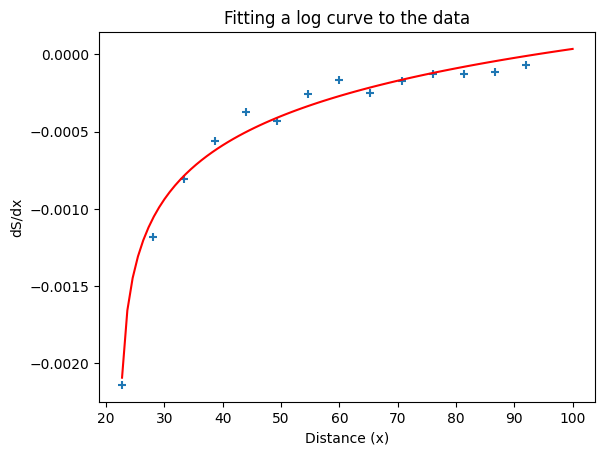

In [124]:
def f(x, a, b, c):
    return a * np.log(x+b) + c

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.001,-5,-0.005))[0]
print("a =",p3[0],"\nb =",p3[1],"\nc =",p3[2])

x = np.linspace(10,100,100)

y3 = (p3[0] * np.log(x+p3[1])) + p3[2]

plt.plot(x,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Fitting a log curve to the data")

In [125]:
neg_log_grads = []
log_xs = []

for y in grad_ys:
    neg_log_grads.append(np.log(-1 * y))
for x in grad_xs:
    log_xs.append(np.log(x))

Text(0.5, 1.0, 'ln-ln plot of data')

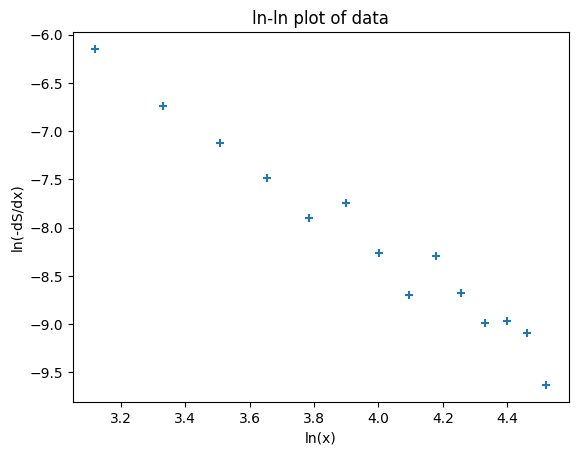

In [126]:
plt.scatter(log_xs,neg_log_grads,marker="+")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("ln-ln plot of data")

In [127]:
# could remove outliers here
p4 = np.polyfit(log_xs,neg_log_grads,1)
p4

array([-2.23520431,  0.74095581])

Text(0.5, 1.0, 'Plotting linear LOBF')

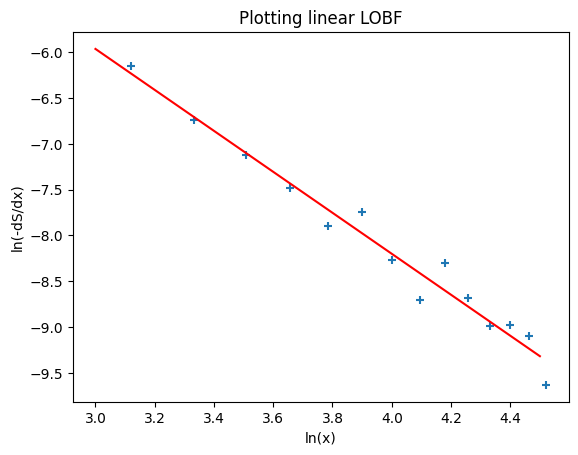

In [128]:
x = np.linspace(3.0,4.5,100)
y = p4[0] * x + p4[1]

plt.scatter(log_xs,neg_log_grads,marker="+")
plt.plot(x,y,"red")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("Plotting linear LOBF")

In [129]:
print("The gradient of the ln-ln plot is %s"%round(p4[0],9))

The gradient of the ln-ln plot is -2.235204314


Text(0, 0.5, 'log(time taken (s))')

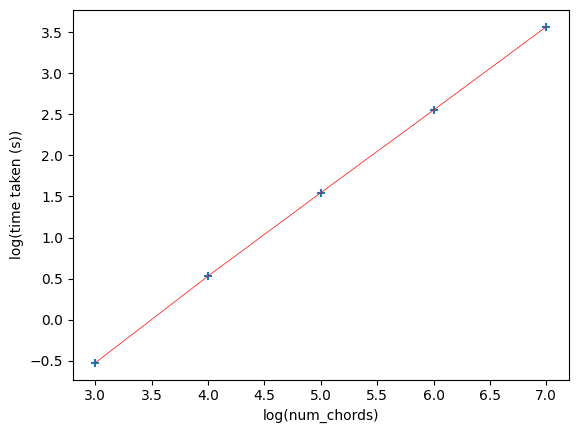

In [133]:
with open("vary_num_chords.txt") as chords_data:
    chords_data_list = chords_data.read().splitlines()
chords_x,chords_y = [],[]
for val in chords_data_list:
    chords_x.append(np.log10(int(val.split(",")[0])))
    chords_y.append(np.log10(float(val.split(",")[1])))

plt.scatter(chords_x,chords_y,marker="+")
plt.plot(chords_x,chords_y,"red",linewidth=0.5)
plt.xlabel("log(num_chords)")
plt.ylabel("log(time taken (s))")

# Ideas:

Graph multiple datasets or their LOBFs, calculate mean or median of them

Graph how long varying number of simulations (fix num_chords)

Remove outliers from gradient graph and try again

Graph the mathematical derivative of the curve fit values and compare